In [2]:
from granger_causality_figure_generation import *
from granger_causality_utils import *

In [3]:
dir = '/home/aidan/data/granger_wholefile/'
numpy_arrays = {}
for filename in os.listdir(dir):
    if filename.endswith('.npy'):
        array_name = filename.replace('.npy', '')
        npy_path = os.path.join(dir, filename)
        numpy_arrays[array_name] = np.load(npy_path,allow_pickle=True)
        print(f"Loaded {array_name}")

print(f'All {len(numpy_arrays)} .npy files have been loaded into memory.')

Loaded sent_sup44_gc_sup6v_results
Loaded sent_sup6v_gc_sup44_results
Loaded sent_inf44_gc_sup6v_results
Loaded sent_inf6v_gc_sup44_results
Loaded word_sup6v_gc_sup44_results
Loaded sent_sup44_gc_inf6v_results
Loaded word_inf44_gc_inf6v_results
Loaded word_inf6v_gc_sup44_results
Loaded sent_inf44_gc_inf6v_results
Loaded word_sup44_gc_sup6v_results
Loaded word_inf44_gc_sup6v_results
Loaded word_sup6v_gc_inf44_results
Loaded sent_sup6v_gc_inf44_results
Loaded word_sup44_gc_inf6v_results
Loaded sent_inf6v_gc_inf44_results
Loaded word_inf6v_gc_inf44_results
All 16 .npy files have been loaded into memory.


In [5]:
proc_tot_all = apply_function_to_arrays(numpy_arrays, process_array_data, pval_threshold=0.01/(64*64*8),sum_axes=(0,1,2),normalize=True)
proc_tot_sep = apply_function_to_arrays(numpy_arrays, process_array_data, pval_threshold=0.01/(64*64*8),sum_axes=(0,1),normalize=True)
proc_tot_timelag1 = apply_function_to_arrays(proc_tot_sep,apply_slices,slices=[(1,2)])
proc_tot_timelag8 = apply_function_to_arrays(proc_tot_sep,apply_slices,slices=[(7,8)])

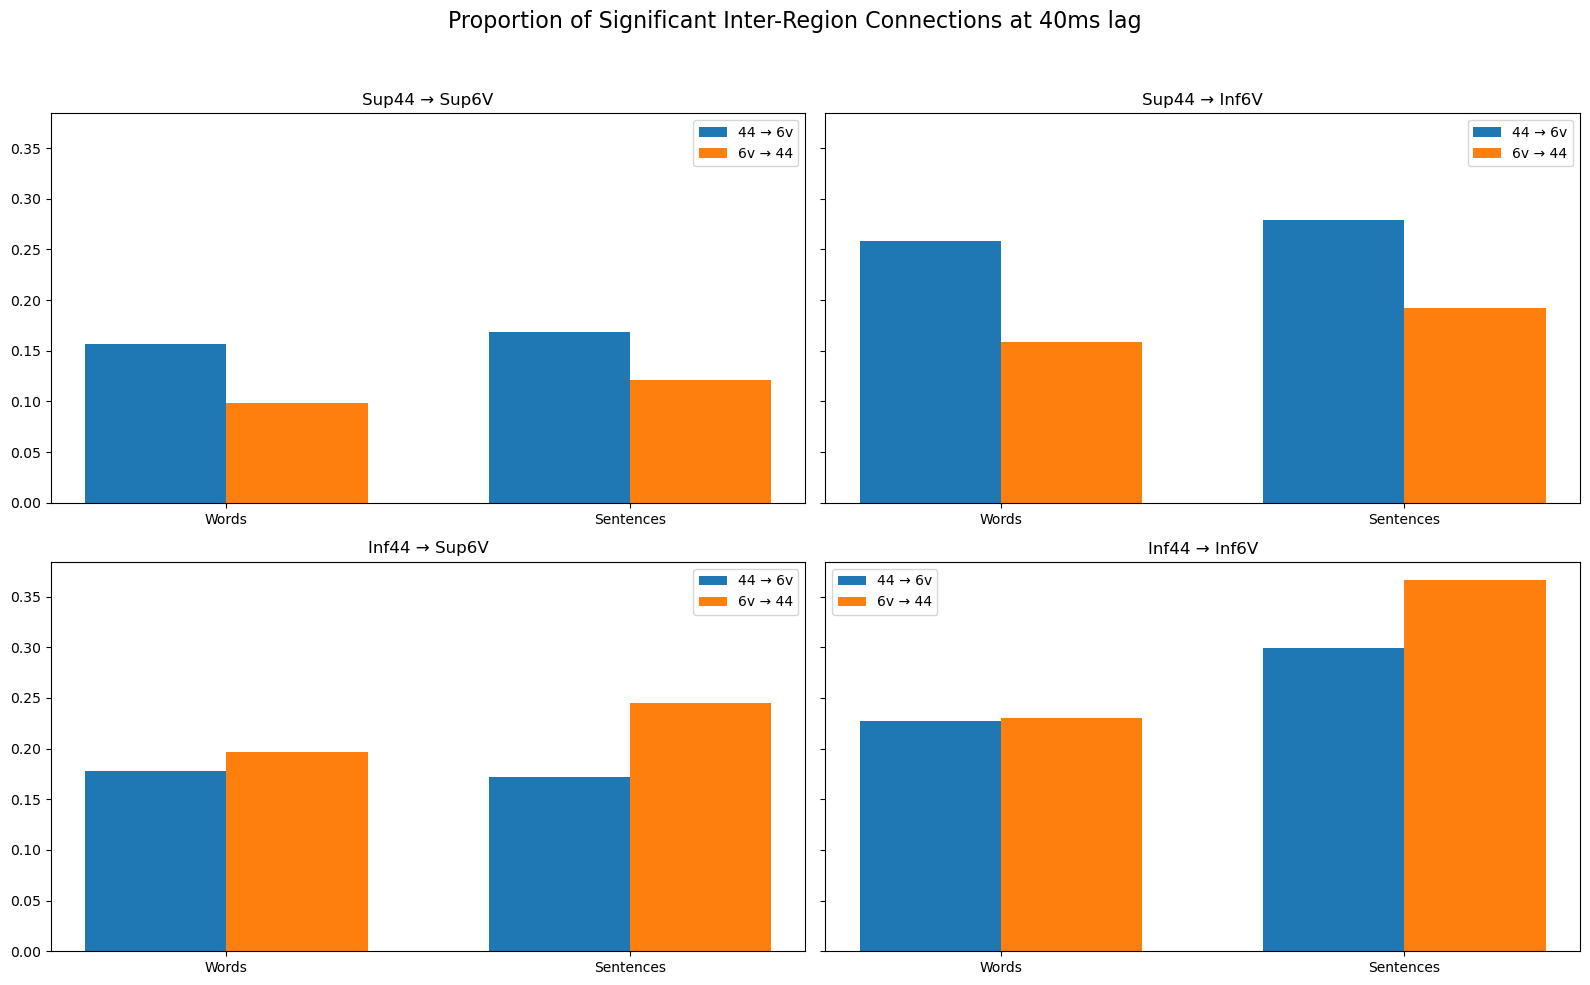

In [6]:
figPath = 'figures/barchart_40ms'
plot_comparison_bar_charts(proc_tot_timelag1,title='Proportion of Significant Inter-Region Connections at 40ms lag',saveFig=False)

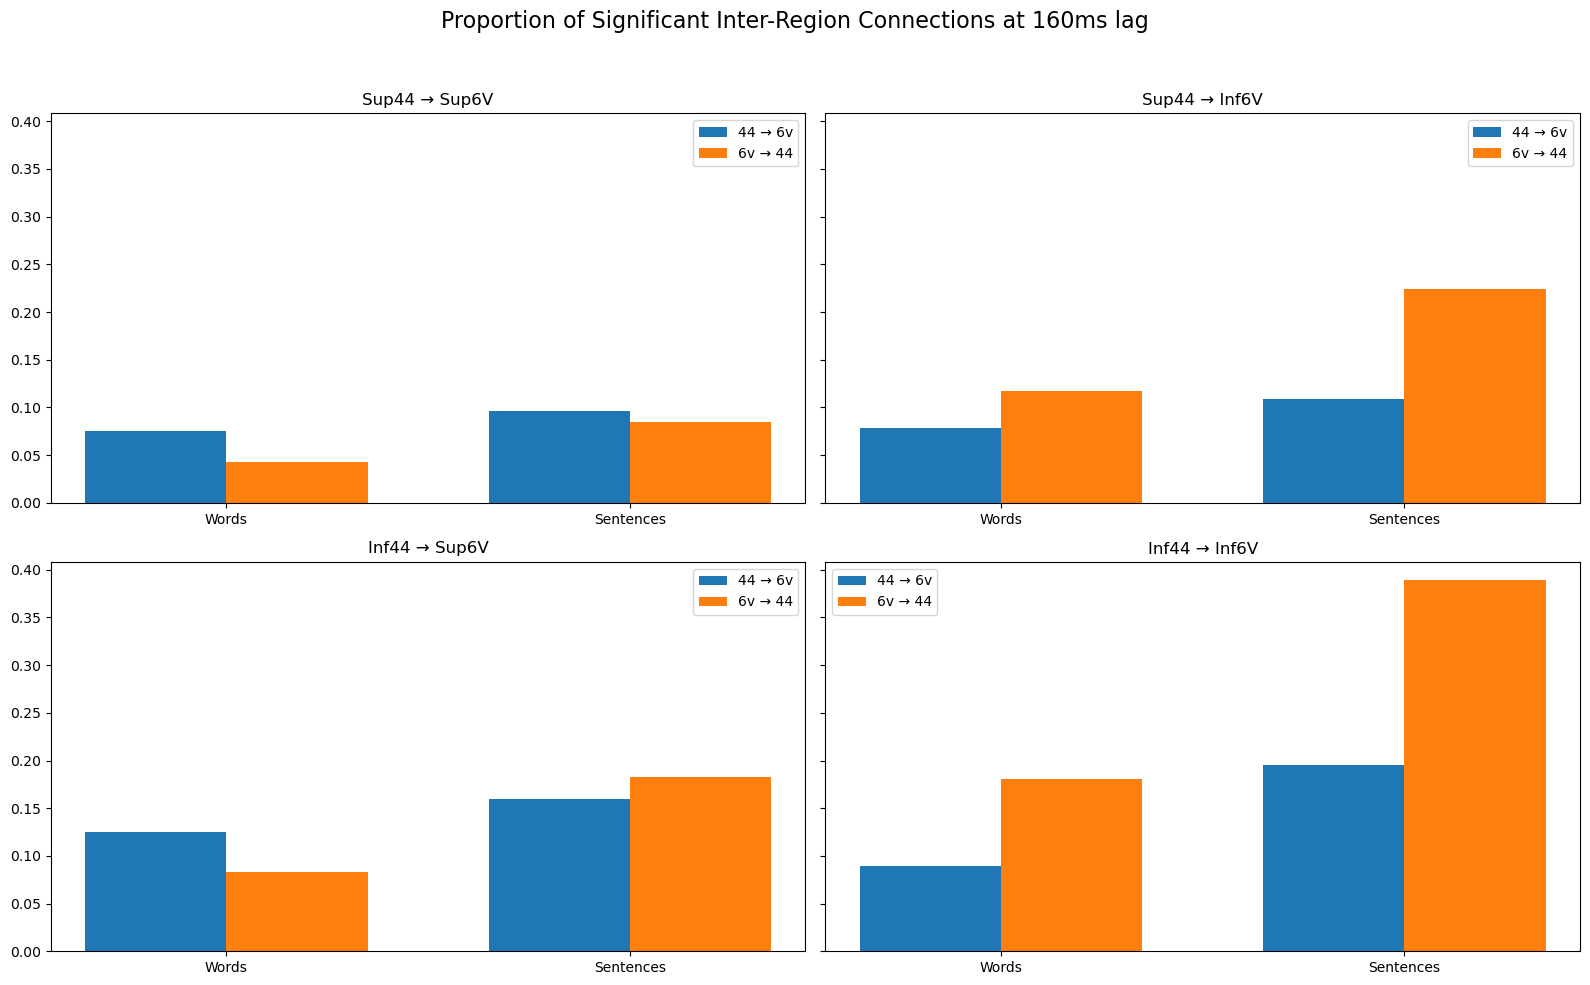

In [7]:
figPath = 'figures/barchart_160ms'
plot_comparison_bar_charts(proc_tot_timelag8,title='Proportion of Significant Inter-Region Connections at 160ms lag',saveFig=False)

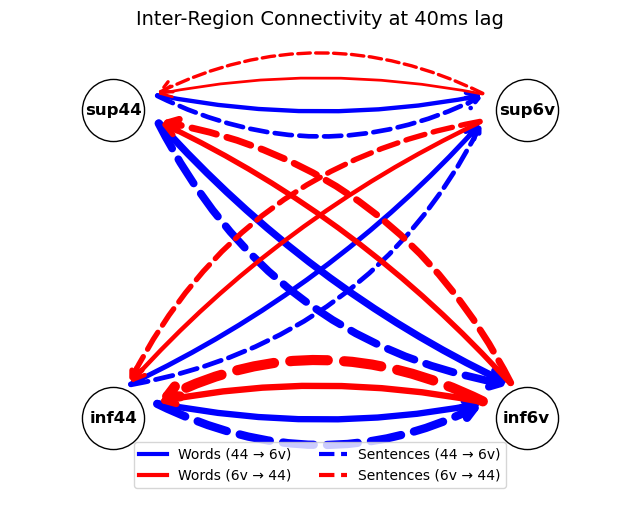

In [8]:
figPath = 'figures/flow_40ms'
plot_causality_flow(proc_tot_timelag1,title='Inter-Region Connectivity at 40ms lag',saveFig=False)

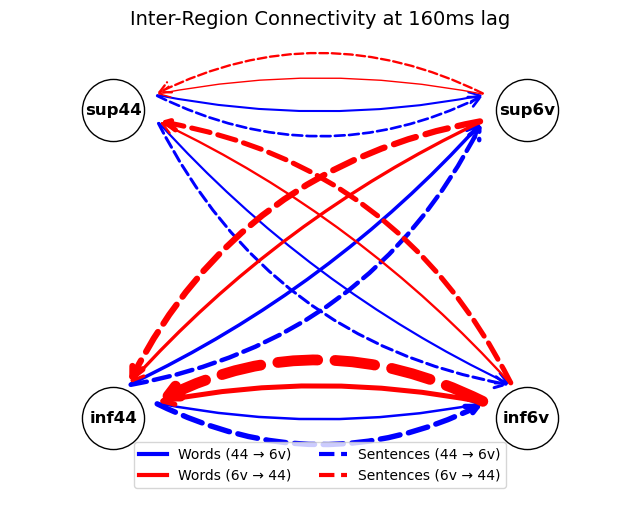

In [9]:
figPath = 'figures/flow_160ms'
plot_causality_flow(proc_tot_timelag8,title='Inter-Region Connectivity at 160ms lag',saveFig=False)